In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.shape

(200, 5)

 Segmentation using Annual Income and Spending Score

In [6]:
from sklearn.cluster import KMeans

In [7]:
X1 =  df[["Annual Income (k$)","Spending Score (1-100)"]]
inertia = []

for n in range(1,11):
    algo = (KMeans(n_clusters=n,max_iter=300))
    algo.fit(X1)
    inertia.append(algo.inertia_)

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Inertia')

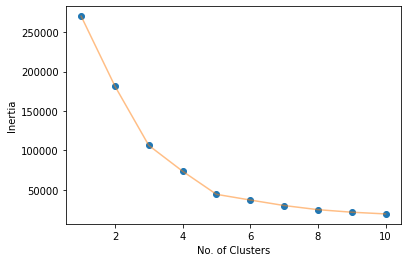

In [9]:
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-',alpha=0.5)

plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

In [10]:
# k=5
algo = (KMeans(n_clusters=5,max_iter=300))
algo.fit(X1)
labels1 = algo.labels_
centroids1 = algo.cluster_centers_

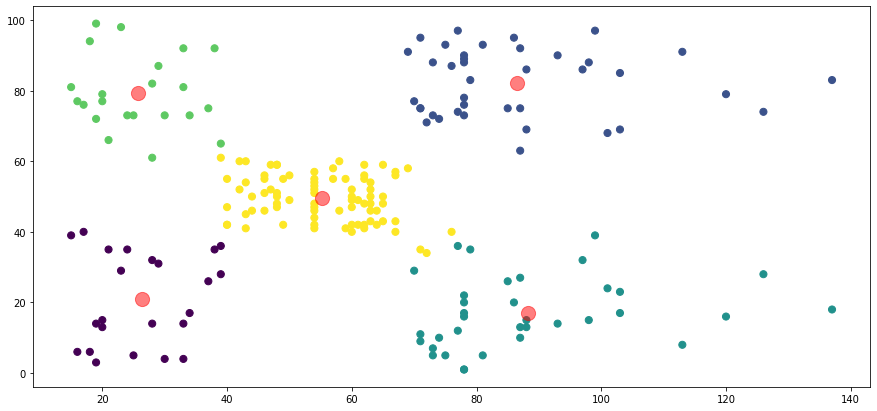

In [11]:


plt.figure(1 , figsize = (15 , 7) )
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 50 )

plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 200, c = 'red' , alpha = 0.5)

In [12]:
X2 =  df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
inertia = []

for n in range(1,11):
    algo = (KMeans(n_clusters=n,max_iter=300))
    algo.fit(X2)
    inertia.append(algo.inertia_)

Text(0, 0.5, 'Inertia')

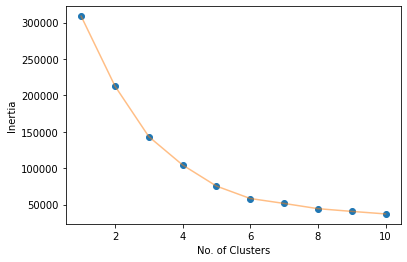

In [13]:
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-',alpha=0.5)

plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

In [14]:
# k=6
algo = (KMeans(n_clusters=6,max_iter=300))
algo.fit(X2)
labels2 = algo.labels_
centroids2 = algo.cluster_centers_

In [15]:
import plotly.express as px

px.scatter_3d(df, x='Age',y = 'Annual Income (k$)' ,
              z= 'Spending Score (1-100)',color=labels2,
             size_max=8)

In [16]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [17]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(X1, labels1))


Silhouette Coefficient: 0.554
